In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normal(mu, sigma, n):
    return np.random.normal(mu,sigma,n).reshape([-1,1])

def getp(vec, centers, k):
    _a = (1+np.linalg.norm(vec - centers[k])**2) ** -1
    _b = 0
    for _k in range(len(centers)):
        _b += (1+np.linalg.norm(vec - centers[_k])**2) ** -1

    return  _a / _b

def getap(qmat, f_k, j, k):
    _a = qmat[j,k]**2 / f_k[k]
    _b = 0
    for idx,_f in enumerate(f_k):
        _b += qmat[j,idx]**2/f_k[idx]
    
    return _a/_b

def getLoss(pmat, qmat, j):
    l = 0
    for k in range(pmat.shape[1]):
        l += pmat[j,k] * np.log(pmat[j,k]/qmat[j,k])

    return l

In [3]:
samples = np.concatenate((normal(0.0,0.5,100),normal(5.0,0.5,100)))
centers = np.array([[0],[5]])

In [5]:
samples.sort(axis=0)
samples

array([[-1.50652972e+00],
       [-1.48085635e+00],
       [-1.44088422e+00],
       [-1.34761548e+00],
       [-1.08367030e+00],
       [-8.58154765e-01],
       [-8.18212410e-01],
       [-7.88460265e-01],
       [-7.61032997e-01],
       [-6.80762551e-01],
       [-6.76322612e-01],
       [-6.53526797e-01],
       [-5.43856874e-01],
       [-4.83343512e-01],
       [-4.77985999e-01],
       [-4.62476866e-01],
       [-4.54924368e-01],
       [-4.50082283e-01],
       [-4.48770662e-01],
       [-4.44596935e-01],
       [-4.20122962e-01],
       [-4.07569354e-01],
       [-3.97306279e-01],
       [-3.77751248e-01],
       [-3.76649732e-01],
       [-3.71055295e-01],
       [-3.50955575e-01],
       [-3.48140596e-01],
       [-3.39147118e-01],
       [-3.36714717e-01],
       [-3.32295755e-01],
       [-3.31655472e-01],
       [-3.22578731e-01],
       [-3.18064345e-01],
       [-2.29158459e-01],
       [-2.25680451e-01],
       [-1.98926585e-01],
       [-1.42701795e-01],
       [-1.4

In [129]:
qmat = np.zeros([len(samples),len(centers)])
for j in range(qmat.shape[0]):
    for k in range(qmat.shape[1]):
        qmat[j,k] = getp(samples[j], centers, k)

f_k = qmat.sum(axis=0)

pmat = np.zeros([len(samples),len(centers)])
for j in range(pmat.shape[0]):
    for k in range(pmat.shape[1]):
        pmat[j,k] = getap(qmat, f_k, j, k) 

loss = np.zeros([len(samples)])
for j in range(loss.shape[0]):
    loss[j] = getLoss(pmat,qmat,j)

totalLoss = loss.sum()/len(samples)

0.038452576568362366

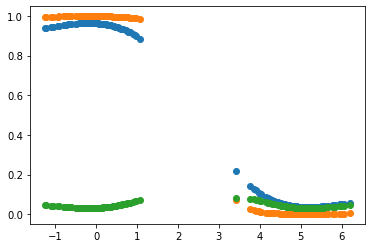

In [130]:
plt.scatter(samples.reshape([-1]), qmat[:,0])
plt.scatter(samples.reshape([-1]), pmat[:,0])
plt.scatter(samples.reshape([-1]), loss)
totalLoss

In [113]:
tLoss = []
for c2 in np.arange(-3,17,0.1):
    centers = np.array([[0],[c2]])
    qmat = np.zeros([len(samples),len(centers)])
    for j in range(qmat.shape[0]):
        for k in range(qmat.shape[1]):
            qmat[j,k] = getp(samples[j], centers, k)

    f_k = qmat.sum(axis=0)

    pmat = np.zeros([len(samples),len(centers)])
    for j in range(pmat.shape[0]):
        for k in range(pmat.shape[1]):
            pmat[j,k] = getap(qmat, f_k, j, k) 

    loss = np.zeros([len(samples)])
    for j in range(loss.shape[0]):
        loss[j] = getLoss(pmat,qmat,j)

    totalLoss = loss.sum()/len(samples)
    tLoss.append(totalLoss)

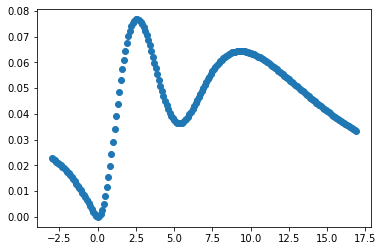

In [114]:
plt.scatter(np.arange(-3,17,0.1),tLoss)

(array([ 1.,  5., 11., 16., 17., 21., 17.,  6.,  3.,  4.,  1.,  2.,  4.,
        13., 18., 21., 20.,  6., 10.,  4.]),
 array([-2.30964992e+00, -1.84759188e+00, -1.38553385e+00, -9.23475816e-01,
        -4.61417783e-01,  6.40250002e-04,  4.62698283e-01,  9.24756316e-01,
         1.38681435e+00,  1.84887238e+00,  2.31093042e+00,  2.77298845e+00,
         3.23504648e+00,  3.69710451e+00,  4.15916255e+00,  4.62122058e+00,
         5.08327861e+00,  5.54533665e+00,  6.00739468e+00,  6.46945271e+00,
         6.93151075e+00]),
 <BarContainer object of 20 artists>)

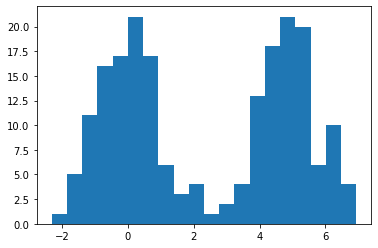

In [22]:
plt.hist(samples.reshape([-1]), bins=20)

In [ ]:
getp(vec, centers, 0)